In [60]:

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [61]:
data=pd.read_csv('wine.csv')
df=pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


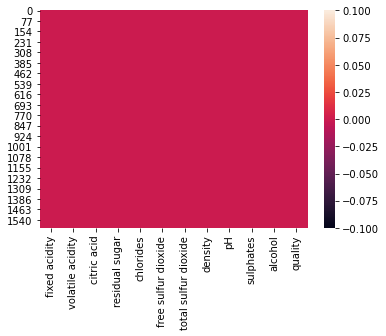

In [64]:
sns.heatmap(df.isnull())

In [65]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [66]:
x=df.iloc[:,0:-1]
x.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [67]:
y=df.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [68]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=88)

In [70]:
x_train.shape

(1071, 11)

In [71]:
y_train.shape

(1071,)

In [72]:
x_test.shape

(528, 11)

In [73]:
y_test.shape

(528,)

In [74]:
lg=LogisticRegression()

In [75]:
lg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
pred=lg.predict(x_test)
print(pred)

[5 5 5 6 5 6 5 5 6 6 6 6 6 5 6 6 5 6 6 6 5 6 5 5 5 5 6 6 5 6 5 6 5 6 5 6 6
 5 5 5 5 6 5 6 5 5 5 5 6 6 6 5 6 5 6 6 5 6 6 5 6 6 6 5 6 6 6 5 5 5 6 6 6 6
 5 6 5 6 6 6 6 6 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5 6 6 6 5 5 6 6 5 6 6 6 5 5 6
 5 5 6 6 5 5 5 6 6 6 5 5 6 6 5 5 5 6 5 6 5 6 6 6 5 5 4 5 5 6 6 6 5 5 5 5 7
 6 5 5 5 6 5 5 6 6 6 5 6 5 6 6 6 5 5 6 6 5 5 6 6 6 5 5 6 5 5 5 5 5 5 5 5 5
 6 6 6 5 5 6 5 6 5 6 6 6 6 6 5 5 5 6 5 6 5 6 5 6 5 5 5 6 5 5 6 5 5 5 6 5 5
 6 5 5 6 5 6 5 6 5 6 5 5 6 6 5 5 6 6 5 5 6 5 6 6 5 6 5 5 6 6 5 6 5 6 6 5 5
 5 5 5 5 5 5 6 6 6 5 5 5 6 5 6 6 5 6 5 5 6 5 6 6 6 5 6 5 6 6 6 5 5 6 5 6 6
 6 5 6 5 6 5 5 5 5 6 5 6 6 5 5 5 5 6 5 5 5 5 6 6 5 5 6 6 5 5 5 5 6 6 5 5 5
 7 5 6 5 5 5 5 5 5 6 6 5 5 5 6 5 5 6 5 6 5 6 6 5 6 5 6 6 6 5 5 6 5 6 5 5 5
 5 6 5 6 5 5 5 6 6 6 6 6 5 5 5 6 5 6 5 6 6 6 6 5 5 5 5 5 6 6 6 5 5 5 6 5 6
 6 5 6 5 5 6 5 5 6 6 5 6 5 6 6 6 5 5 6 5 5 6 5 6 5 5 5 6 5 6 5 6 6 5 5 6 5
 5 6 6 5 5 5 6 5 5 5 6 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 6 5 6 5 6 6 5 6 5 6 5
 5 5 5 6 5 6 6 5 5 6 6 5 

In [77]:
print("Accuracy_score:", accuracy_score(y_test,pred))

Accuracy_score: 0.5606060606060606


In [78]:
print(confusion_matrix(y_test,pred))

[[  0   0   5   0   0   0]
 [  0   0  13   5   0   0]
 [  0   1 170  52   0   0]
 [  0   0  88 126   1   0]
 [  0   0   8  56   0   0]
 [  0   0   0   2   1   0]]


In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        18
           5       0.60      0.76      0.67       223
           6       0.52      0.59      0.55       215
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00         3

    accuracy                           0.56       528
   macro avg       0.19      0.22      0.20       528
weighted avg       0.47      0.56      0.51       528



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [81]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.5246212121212122


In [82]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.4772727272727273
[[  0   0   1   4   0   0]
 [  0   0   3  15   0   0]
 [  0   0  96 127   0   0]
 [  0   0  60 155   0   0]
 [  0   0   5  58   1   0]
 [  0   0   0   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        18
           5       0.58      0.43      0.49       223
           6       0.43      0.72      0.54       215
           7       1.00      0.02      0.03        64
           8       0.00      0.00      0.00         3

    accuracy                           0.48       528
   macro avg       0.33      0.19      0.18       528
weighted avg       0.54      0.48      0.43       528



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross validation

In [88]:
from sklearn.model_selection import cross_val_score

gnbscores=cross_val_score(gnb,x,y,cv=8)
print(gnbscores)
print(gnbscores.mean(), gnbscores.std())

[0.44       0.545      0.545      0.495      0.59       0.485
 0.61       0.54773869]
0.5322173366834171 0.05253014442939777


In [89]:
svcscores=cross_val_score(svc,x,y,cv=8)
print(svcscores)
print(svcscores.mean(), svcscores.std())

[0.52       0.63       0.515      0.475      0.47       0.47
 0.485      0.44723618]
0.5015295226130653 0.053549399028081125


In [90]:
#Saving the model

import joblib

#saving model as pickle in a file
joblib.dump(lg, 'wine.pkl')

['wine.pkl']